# Analysis of Air Pollution Sources in London

- We will be looking at the main sources of common air pollutants (NOx, PM2.5, PM10, CO) in London 
- This will help us to provide solutions/initiatives that will help reduce air pollution levels overall
- Additionally will also be able to see if current initiatives such as ULEZ which tackles air pollution caused by cars will make a significant impact due to the amount of pollution caused by cars
- Finally we look at Hammermsith and Fulham Borough speicifically as our research has shown that this is one of the most highly (air) polluted boroughs in London

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data from CSV file

- For this analysis we will be looking at the London Atmospheric Emissions Inventory (LAEI) data for 2019, 2016 and 2013

In [21]:
laei_df = pd.read_excel('../data_unclean/LAEI-2019-Emissions-Summary-including-Forecast.xlsx', sheet_name='Emissions by Grid ID')

In [22]:
laei_df

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699115,2013,3456,10059,531500,179500,Southwark,Inner,Transport,Road Transport,TfL Bus,...,NaN,NaN,NaN,3.951442,NaN,NaN,0.118086,0.063485,NaN,tonnes/annum
699116,2013,3457,10059,531500,179500,Southwark,Central,Transport,Road Transport,TfL Bus,...,NaN,NaN,NaN,11.948519,NaN,NaN,0.350322,0.189620,NaN,tonnes/annum
699117,2013,3458,9714,530500,181500,Camden,Central,Transport,Road Transport,TfL Bus,...,NaN,NaN,NaN,20.890075,NaN,NaN,0.514696,0.283530,NaN,tonnes/annum
699118,2013,3459,9716,532500,181500,Islington,Central,Transport,Road Transport,TfL Bus,...,NaN,NaN,NaN,1.526047,NaN,NaN,0.041530,0.022583,NaN,tonnes/annum


## Data Cleaning

In [23]:
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  699120 non-null  int64  
 1   Grid ID 2019          699120 non-null  int64  
 2   LAEI 1km2 ID          699120 non-null  int64  
 3   Easting               699120 non-null  int64  
 4   Northing              699120 non-null  int64  
 5   Borough               699120 non-null  object 
 6   Zone                  699120 non-null  object 
 7   Main Source Category  699120 non-null  object 
 8   Sector                699120 non-null  object 
 9   Source                699120 non-null  object 
 10  bap                   162620 non-null  float64
 11  cd                    128020 non-null  float64
 12  c4h6                  186840 non-null  float64
 13  c6h6                  217980 non-null  float64
 14  ch4                   266420 non-null  float64
 15  

Organising columns

In [24]:
# Changing all columns to upper case
laei_df.columns = laei_df.columns.str.upper()
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2.5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [25]:
# Renaming PM2.5 column to remove '.'
laei_df = laei_df.rename(columns = {'PM2.5':'PM2_5'})
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2_5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [26]:
# Removing columns not needed for analysis 
laei_df.drop(columns=['GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING','BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO2', 'HC', 'HCL', 'HG', 'NH3', 'NMVOC', 'PB', 
                       'PCB', 'SO2'], inplace=True )
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  699120 non-null  int64  
 1   BOROUGH               699120 non-null  object 
 2   ZONE                  699120 non-null  object 
 3   MAIN SOURCE CATEGORY  699120 non-null  object 
 4   SECTOR                699120 non-null  object 
 5   SOURCE                699120 non-null  object 
 6   CO                    266420 non-null  float64
 7   N2O                   186840 non-null  float64
 8   NOX                   595656 non-null  float64
 9   PM10                  681820 non-null  float64
 10  PM2_5                 681820 non-null  float64
 11  EMISSIONS UNIT        699120 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 64.0+ MB


In [27]:
# Removing rows not needed for analysis 

# We will not be looking at data fo 2025 and 2030 and also data for NON-GLA

laei_df.shape #check intial number of records(rows)

laei_df = laei_df.loc[laei_df['YEAR'] != 2030]
laei_df = laei_df.loc[laei_df['YEAR'] != 2025]
laei_df = laei_df.loc[laei_df['BOROUGH'] != 'Non GLA']

laei_df.shape #check final number of records(rows)


(293048, 12)

Initial inspection of data and sorting out any data issues

In [28]:
# Brief look at statistics for each year
laei_df[laei_df['YEAR'] == 2019].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,101948.0,36750.000000,24500.000000,87248.000000,99498.000000,99498.000000
mean,2019.0,0.514589,0.023569,0.409131,0.075312,0.033473
std,0.0,7.153357,0.979916,5.397396,0.808104,0.192679
min,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,0.000001,0.000010,0.002874,0.001335,0.000765
75%,2019.0,0.151666,0.002160,0.126147,0.024074,0.013797
max,2019.0,837.234049,107.050000,1000.194271,114.906839,21.364992


In [29]:
laei_df[laei_df['YEAR'] == 2016].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2016.0,0.458478,0.018064,0.540761,0.083738,0.037756
std,0.0,7.823388,0.902031,5.914221,0.771056,0.204585
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,0.000000,0.000000,0.003124,0.001077,0.000643
75%,2016.0,0.091148,0.000411,0.200184,0.029067,0.017324
max,2016.0,846.284267,106.900000,1021.816850,116.908248,23.070241


In [30]:
laei_df[laei_df['YEAR'] == 2013].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2013.0,0.394287,0.013043,0.585903,0.084075,0.041555
std,0.0,6.481300,0.607326,4.306888,0.784030,0.193527
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,0.000000,0.000000,0.003206,0.000904,0.000603
75%,2013.0,0.079476,0.000367,0.221821,0.029223,0.017891
max,2013.0,821.646048,69.649867,443.909781,132.712137,23.070241


Due to the nature of the data set there are many 0 values for all pollutants which causes intial statistics to look highly skewed. This is because the data for each borough was broken down into grids and for each grid every possible source of emission was recorded for every pollutant. For example if heat emission led to the production of pm2.5 only in one grid, all the other pollutants were recorded as 0. 


In [31]:
# Checking for NaN values
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                         0
BOROUGH                      0
ZONE                         0
MAIN SOURCE CATEGORY         0
SECTOR                       0
SOURCE                       0
CO                      168098
N2O                     199948
NOX                      44100
PM10                      7350
PM2_5                     7350
EMISSIONS UNIT               0
dtype: int64


Due to nature of the data, there are many NaN avlues for each pollutant. NaN values will be replaced with 0.

In [32]:
laei_df.CO = laei_df.CO.fillna(0)
laei_df.N2O = laei_df.N2O.fillna(0)
laei_df.NOX = laei_df.NOX.fillna(0)
laei_df.PM10 = laei_df.PM10.fillna(0)
laei_df.PM2_5 = laei_df.PM2_5.fillna(0)

In [33]:
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                    0
BOROUGH                 0
ZONE                    0
MAIN SOURCE CATEGORY    0
SECTOR                  0
SOURCE                  0
CO                      0
N2O                     0
NOX                     0
PM10                    0
PM2_5                   0
EMISSIONS UNIT          0
dtype: int64


- Both the Domestic category and Industrial & Commerical category have a sector called Heat and Power generation which can get confusing when we are carrying out sector level analysis. So these values will be udpated to differentiate them

In [34]:
laei_df['SECTOR'] = laei_df.apply(lambda row: 'Dom Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Domestic') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()
laei_df['SECTOR'] = laei_df.apply(lambda row: 'I&C Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()

## Saving Clean Data to CSV File

In [35]:
laei_df.to_csv('clean_LAEI_data.csv', encoding='utf-8')

## Grouping Data

In [36]:
grouped_laei_2019 = laei_df[laei_df['YEAR'] == 2019].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2019['YEAR'] = 2019
grouped_laei_2019

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2019   
                                                     Dom Heat and Power Generation Gas Combustion             2019   
                                                                                   Oil/Coal Combustion        2019   
                                                     Machinery                     Household and Garden NRMM  2019   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2019   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel               2019   
                                                                                   PHV - Electric             2019   
                                                                                   PHV - Petrol               2019   
                                                                                   Taxi                       2019   
                                                                                   TfL Bus                    2019   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             73.739099   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  52.751259   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel                0.000000   
                                                                                   PHV - Electric              0.000000   
                                                                                   PHV - Petrol                0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.283612   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003451   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [37]:
grouped_laei_2016 = laei_df[laei_df['YEAR'] == 2016].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2016['YEAR'] = 2016
grouped_laei_2016

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2016   
                                                     Dom Heat and Power Generation Gas Combustion             2016   
                                                                                   Oil/Coal Combustion        2016   
                                                     Machinery                     Household and Garden NRMM  2016   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2016   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2016   
                                                                                   Motorcycle                 2016   
                                                                                   Non-TfL Bus / Coach        2016   
                                                                                   Taxi                       2016   
                                                                                   TfL Bus                    2016   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.875453   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  51.395698   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268752   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003362   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [38]:
grouped_laei_2013 = laei_df[laei_df['YEAR'] == 2013].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2013['YEAR'] = 2013
grouped_laei_2013

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2013   
                                                     Dom Heat and Power Generation Gas Combustion             2013   
                                                                                   Oil/Coal Combustion        2013   
                                                     Machinery                     Household and Garden NRMM  2013   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2013   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2013   
                                                                                   Motorcycle                 2013   
                                                                                   Non-TfL Bus / Coach        2013   
                                                                                   Taxi                       2013   
                                                                                   TfL Bus                    2013   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.908765   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  50.550130   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268880   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003307   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

## Visualisation

### A look at total pollution levels for London from all sectors

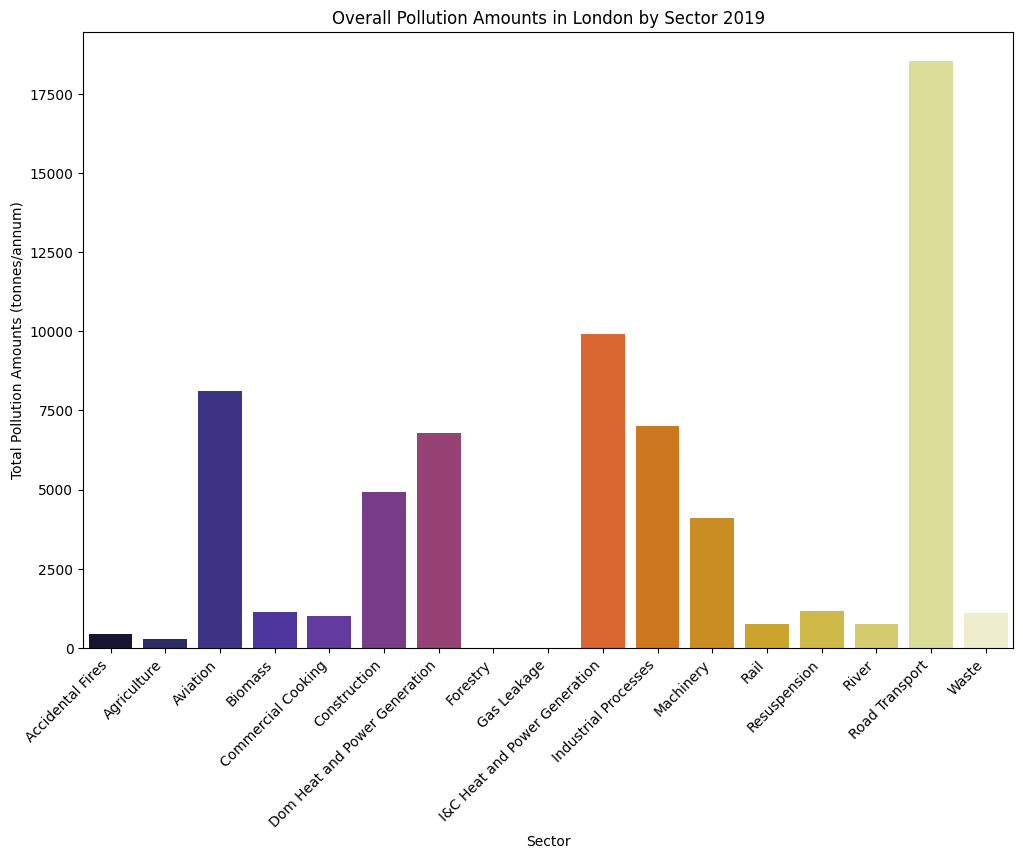

In [39]:
# List of specific pollutants
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']

# Sum of the concentrations of the specified pollutants for each sector
grouped_laei_2019['TOTAL POLLUTION'] = grouped_laei_2019[specific_pollutants].sum(axis=1)
laei_2019_sector = grouped_laei_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each sector
plt.figure(figsize=(12, 8))
sns.barplot(x=laei_2019_sector['SECTOR'], y=laei_2019_sector['TOTAL POLLUTION'], hue=laei_2019_sector['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

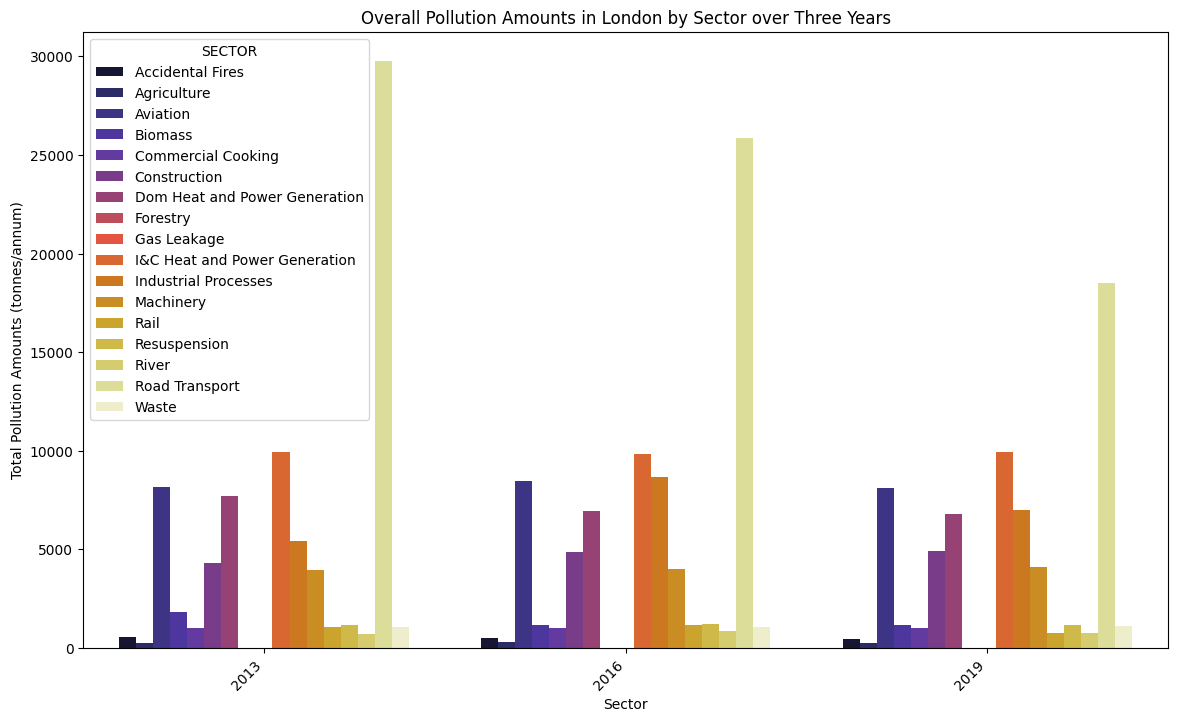

In [40]:

# List of specific pollutants
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']

# Sum of the concentrations of the specified pollutants for each sector per year
grouped_laei_2019['TOTAL POLLUTION'] = grouped_laei_2019[specific_pollutants].sum(axis=1)
laei_2019_sector = grouped_laei_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2019_sector['YEAR'] = 2019

grouped_laei_2016['TOTAL POLLUTION'] = grouped_laei_2016[specific_pollutants].sum(axis=1)
laei_2016_sector = grouped_laei_2016.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2016_sector['YEAR'] = 2016

grouped_laei_2013['TOTAL POLLUTION'] = grouped_laei_2013[specific_pollutants].sum(axis=1)
laei_2013_sector = grouped_laei_2013.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2013_sector['YEAR'] = 2013


# Combining the data into one dataframe
combined_data = pd.concat([laei_2019_sector, laei_2016_sector, laei_2013_sector])

# Plotting the overall pollution concentrations for each sector per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()


- It is very clear from the above graphs that Road Transportation is a major cause of air pollution within London
- Additionally Heat and Power generation for industry/commercial purposes and Industrial Process combined also contribute significantly to overall air pollution within London
- Overall, air pollution amounts have decreased as a whole and significantly for Road Transportation from 2013 to 2019 


### A look at total pollution levels for London from all types of road transporation

- As road transportation is the most significant contribution to air pollution in London, we will look into this sector closer

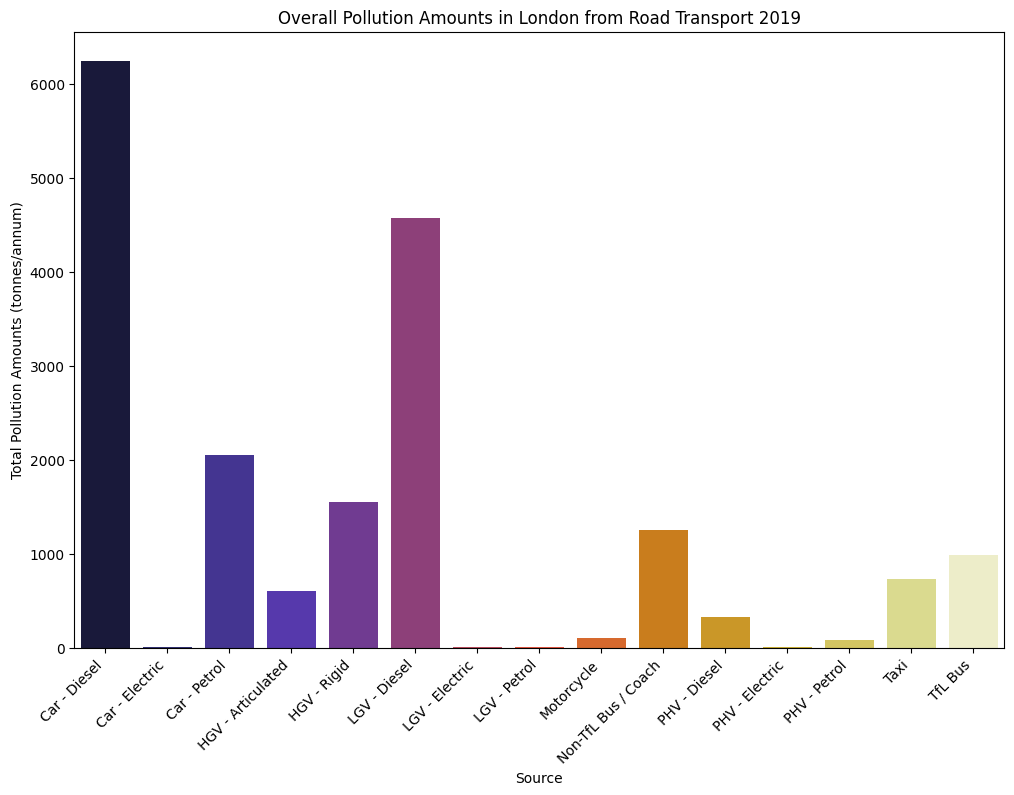

In [41]:
# List of specific pollutants
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']

# Sum of the concentrations of the specified pollutants for each source
grouped_df = grouped_laei_2019.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2019 = grouped_df[grouped_df['SECTOR'] == 'Road Transport']

# Plotting the overall pollution concentrations for each source
plt.figure(figsize=(12, 8))
sns.barplot(x=road_transport_2019['SOURCE'], y=road_transport_2019['TOTAL POLLUTION'], hue=road_transport_2019['SOURCE'], palette='CMRmap')
plt.xlabel('Source')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London from Road Transport 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

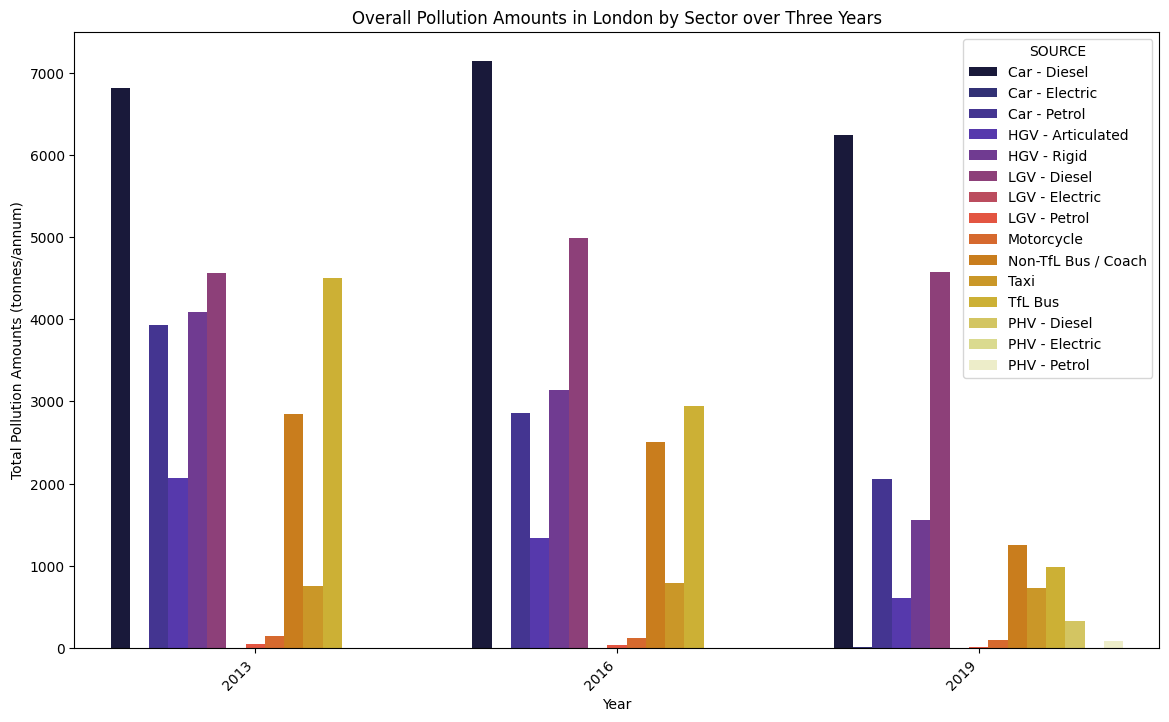

In [42]:

# Sum of the concentrations of the specified pollutants for road transport sources per year
grouped_df_2019 = grouped_laei_2019.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2019 = grouped_df_2019[grouped_df_2019['SECTOR'] == 'Road Transport']
road_transport_2019.loc[:, 'YEAR'] = 2019

grouped_df_2016 = grouped_laei_2016.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2016 = grouped_df_2016[grouped_df_2016['SECTOR'] == 'Road Transport']
road_transport_2016.loc[:, 'YEAR'] = 2016

grouped_df_2013 = grouped_laei_2013.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2013 = grouped_df_2013[grouped_df_2013['SECTOR'] == 'Road Transport']
road_transport_2013.loc[:, 'YEAR'] = 2013

# Combining the data into one dataframe
combined_data = pd.concat([road_transport_2019, road_transport_2016, road_transport_2013])

# Plotting the overall pollution concentrations for each source per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SOURCE'], palette='CMRmap')
plt.xlabel('Year')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()

- From the above graphs we can see that diesel vehicles are contributing the most to air pollution within london


### A look at pollution levels for Hammersmith & Fulham

In [43]:
# Isolating Hammersmith and Fulham data
hammersmith_fulham_2019 = laei_df[(laei_df['BOROUGH'] == 'Hammersmith and Fulham') & (laei_df['YEAR'] == 2019)]
hammersmith_fulham_2019

,YEAR,BOROUGH,ZONE,MAIN SOURCE CATEGORY,SECTOR,SOURCE,CO,N2O,NOX,PM10,PM2_5,EMISSIONS UNIT
288077,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.000000,0.024746,0.024746,tonnes/annum
288081,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.000000,0.003116,0.003116,tonnes/annum
288094,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.000000,0.655945,0.655945,tonnes/annum
288111,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.000000,0.385184,0.385184,tonnes/annum
288112,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.000000,0.279966,0.279966,tonnes/annum
...,...,...,...,...,...,...,...,...,...,...,...,...
429084,2019,Hammersmith and Fulham,Inner,Transport,Road Transport,TfL Bus,0.0,0.0,2.658529,0.270607,0.125996,tonnes/annum
429100,2019,Hammersmith and Fulham,Inner,Transport,Road Transport,TfL Bus,0.0,0.0,0.481865,0.122138,0.054672,tonnes/annum
429103,2019,Hammersmith and Fulham,Inner,Transport,Road Transport,TfL Bus,0.0,0.0,1.397363,0.164906,0.076091,tonnes/annum
429122,2019,Hammersmith and Fulham,Inner,Transport,Road Transport,TfL Bus,0.0,0.0,0.392547,0.089254,0.040035,tonnes/annum


/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_32717/16331836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hammersmith_fulham_2019['TOTAL POLLUTION'] = hammersmith_fulham_2019[specific_pollutants].sum(axis=1)


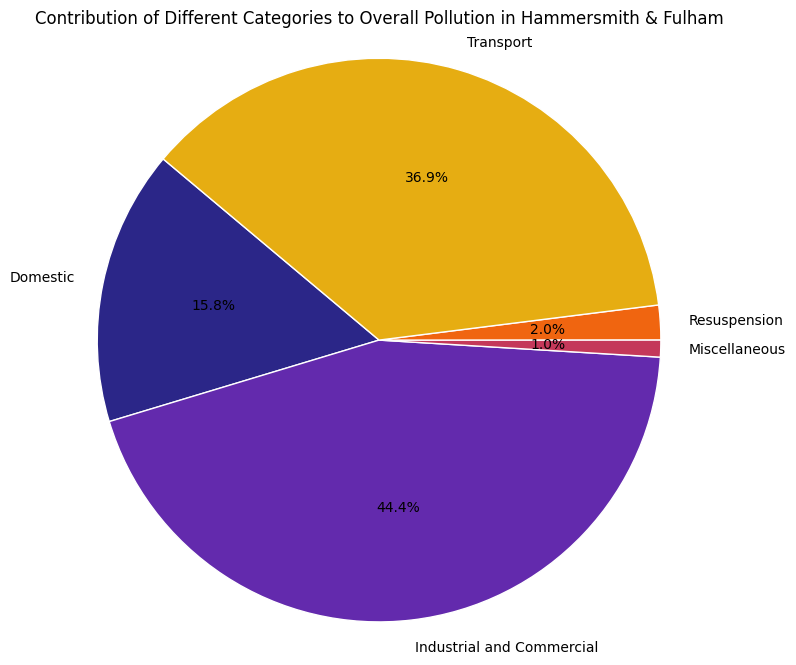

In [44]:
# Creation of dataframe for plotting
hammersmith_fulham_2019['TOTAL POLLUTION'] = hammersmith_fulham_2019[specific_pollutants].sum(axis=1)
category_hammersmith_fulham_2019 = hammersmith_fulham_2019.groupby('MAIN SOURCE CATEGORY')['TOTAL POLLUTION'].sum().reset_index()

# Create the pie chart to show split of air pollution sources across the main categories
plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('CMRmap') 
plt.pie(category_hammersmith_fulham_2019['TOTAL POLLUTION'], labels=category_hammersmith_fulham_2019['MAIN SOURCE CATEGORY'], autopct='%1.1f%%', startangle=140, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=palette_color)
plt.title('Contribution of Different Categories to Overall Pollution in Hammersmith & Fulham')
plt.axis('equal')
plt.show()

- The main sources of air pollution within the borough of Hammersmith & Fulham are Industrial and Commercial sources and Transport sources
- We will look into these two categories more: 

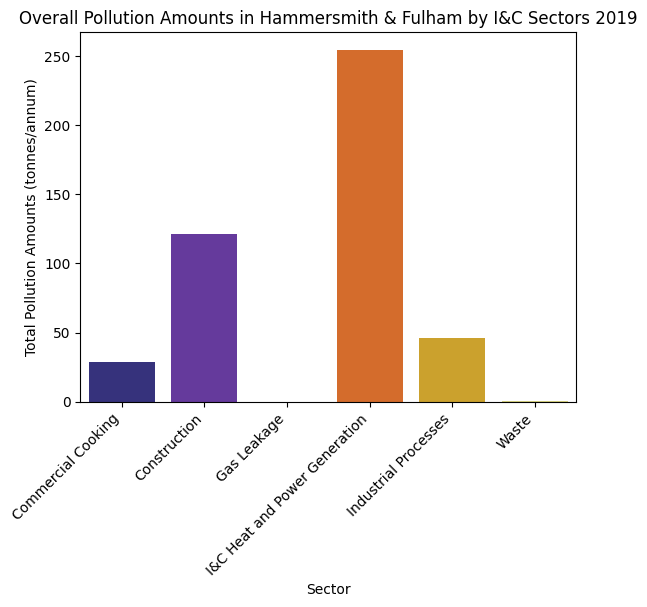

In [45]:
# Creation of dataframe for plotting
IC_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial']
IC_hammersmith_fulham_sector_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
sns.barplot(x=IC_hammersmith_fulham_sector_2019['SECTOR'], y=IC_hammersmith_fulham_sector_2019['TOTAL POLLUTION'], hue=IC_hammersmith_fulham_sector_2019['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by I&C Sectors 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

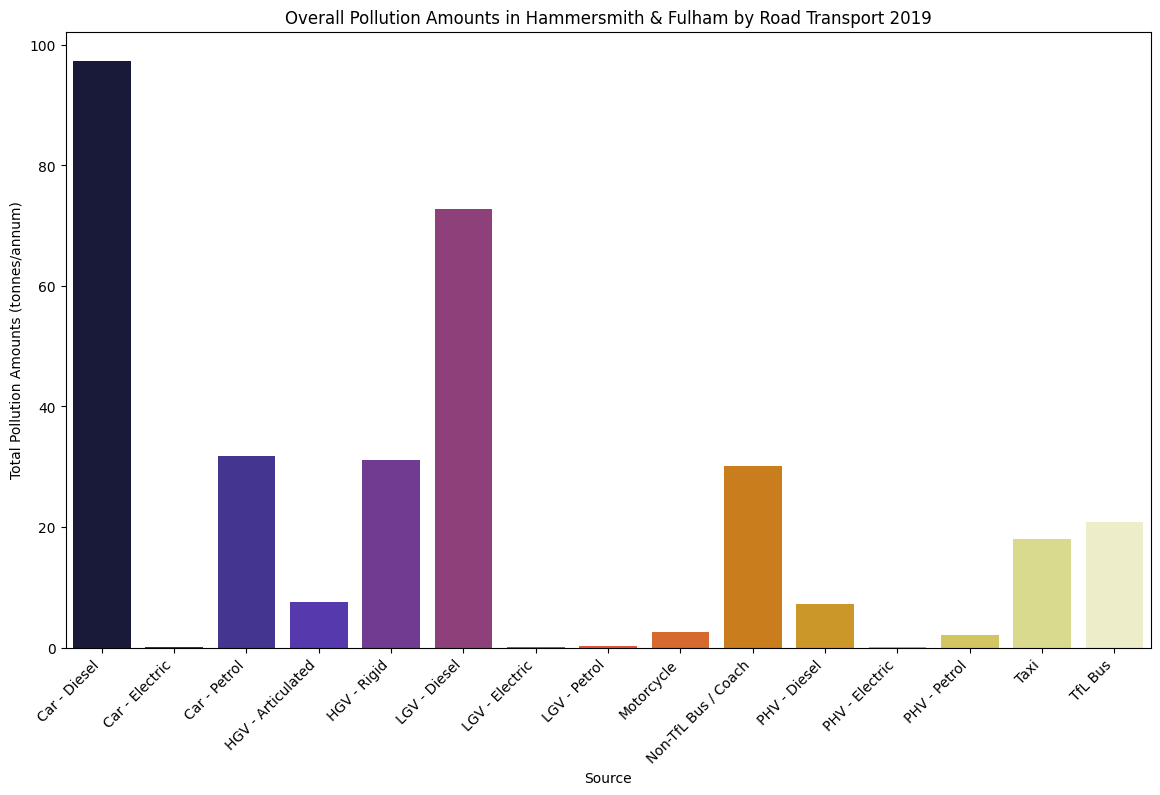

In [46]:
# Creation of dataframe for plotting
road_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['SECTOR'] == 'Road Transport']
road_hammersmith_fulham_source_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
plt.figure(figsize=(14, 8))
sns.barplot(x=road_hammersmith_fulham_source_2019['SOURCE'], y=road_hammersmith_fulham_source_2019['TOTAL POLLUTION'], hue=road_hammersmith_fulham_source_2019['SOURCE'], palette='CMRmap')
plt.xlabel('Source')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by Road Transport 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1400x800 with 0 Axes>

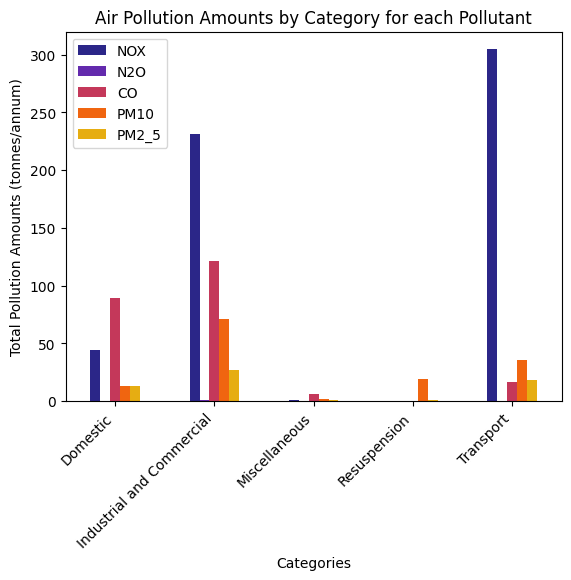

In [47]:
# creating dataframe to plot graph
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']
pollutants_hammersmith_fulham_2019 = hammersmith_fulham_2019.groupby('MAIN SOURCE CATEGORY')[specific_pollutants].sum()

# Plotting each pollutants total amounts for every category
plt.figure(figsize=(14, 8))
palette_color = sns.color_palette('CMRmap') 
pollutants_hammersmith_fulham_2019.plot(kind='bar', color=palette_color)
plt.xlabel('Categories')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Air Pollution Amounts by Category for each Pollutant')
plt.xticks(rotation=45, ha='right')
plt.show()

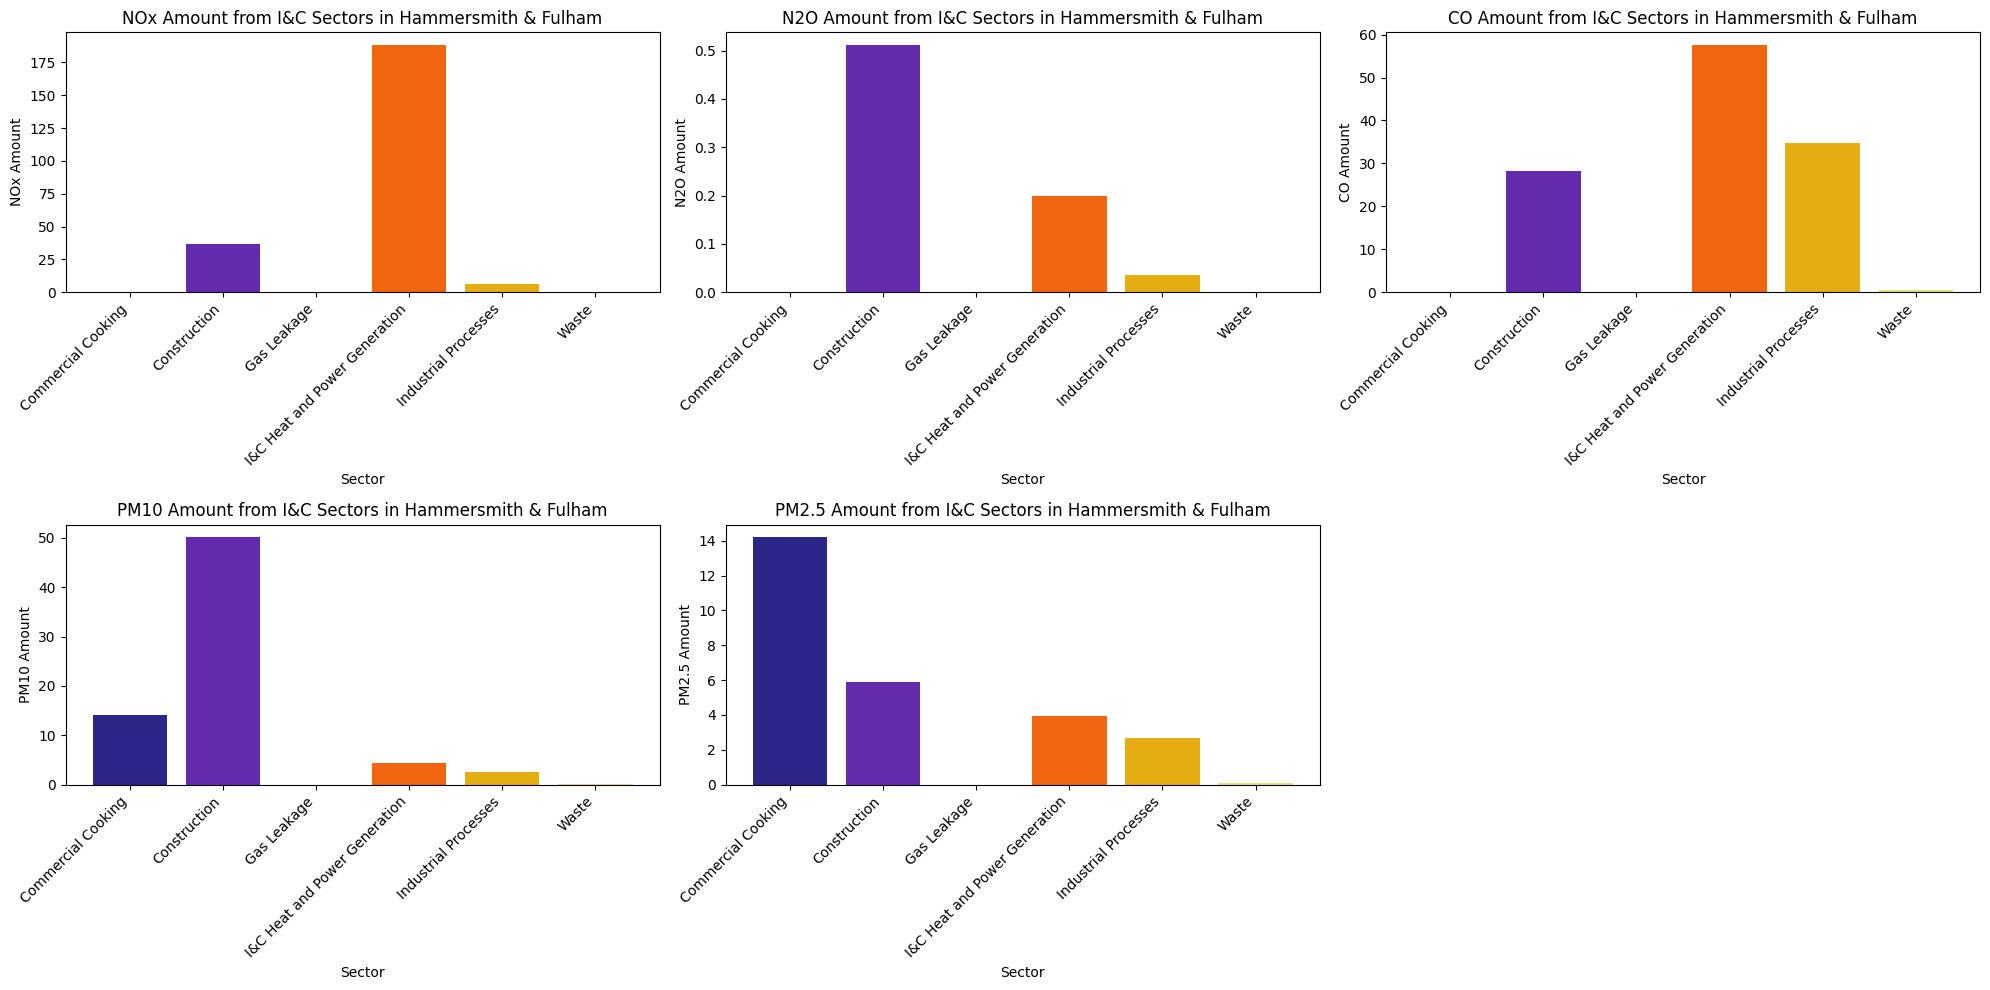

In [48]:
# Creating dataframes to plot on graph
IC_hf_nox_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
IC_hf_n2o_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
IC_hf_co_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
IC_hf_pm10_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
IC_hf_pm2_5_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from industrial and commerical sources
plt.subplot(2,3,1)
plt.bar(IC_hf_nox_2019 ['SECTOR'], IC_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(IC_hf_n2o_2019 ['SECTOR'], IC_hf_n2o_2019['N2O'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('N2O Amount')
plt.title('N2O Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,3)
plt.bar(IC_hf_co_2019 ['SECTOR'], IC_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(IC_hf_pm10_2019 ['SECTOR'], IC_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(IC_hf_pm2_5_2019 ['SECTOR'], IC_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

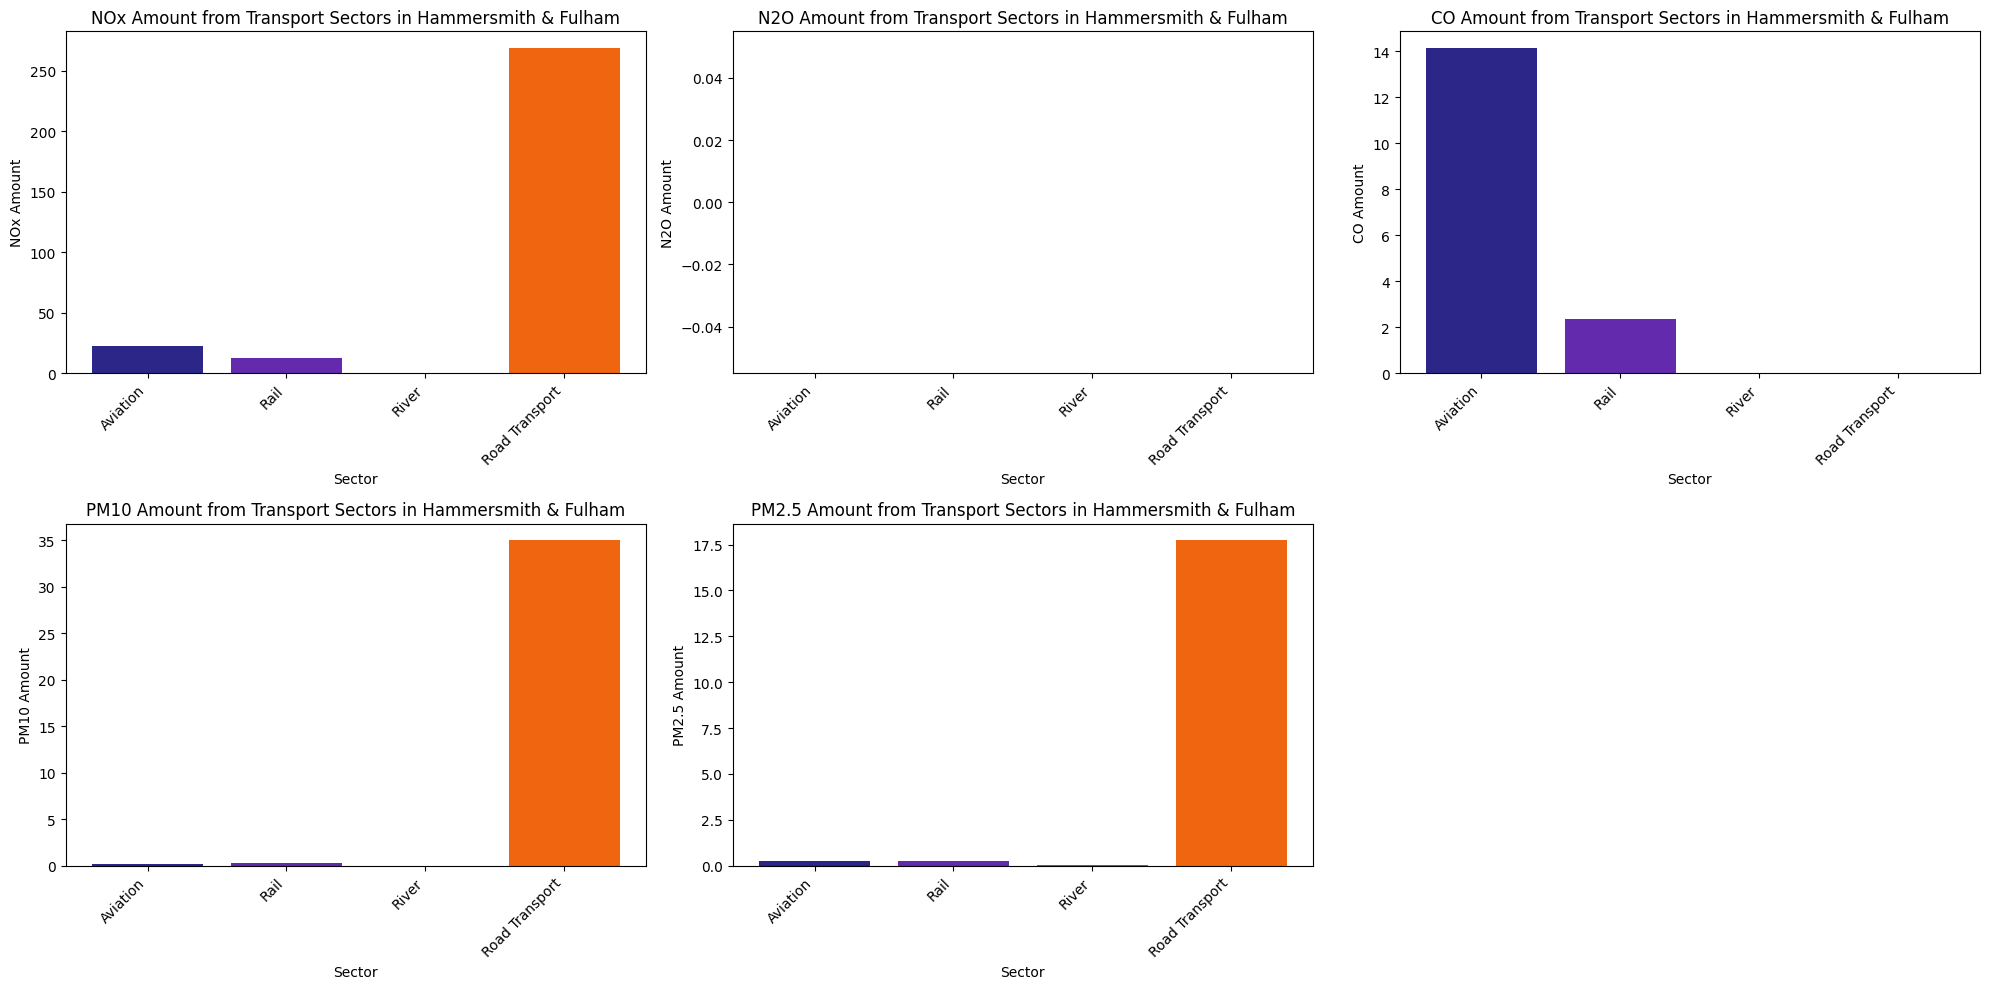

In [49]:
# Filtering data
transport_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['MAIN SOURCE CATEGORY'] == 'Transport']
transport_hammersmith_fulham_source_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Creating dataframes to plot graphs
transport_hf_nox_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
transport_hf_n2o_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
transport_hf_co_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
transport_hf_pm10_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
transport_hf_pm2_5_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from transport sources
plt.subplot(2,3,1)
plt.bar(transport_hf_nox_2019 ['SECTOR'], transport_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(transport_hf_n2o_2019 ['SECTOR'], transport_hf_n2o_2019['N2O'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('N2O Amount')
plt.title('N2O Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,3)
plt.bar(transport_hf_co_2019 ['SECTOR'], transport_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(transport_hf_pm10_2019 ['SECTOR'], transport_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(transport_hf_pm2_5_2019 ['SECTOR'], transport_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



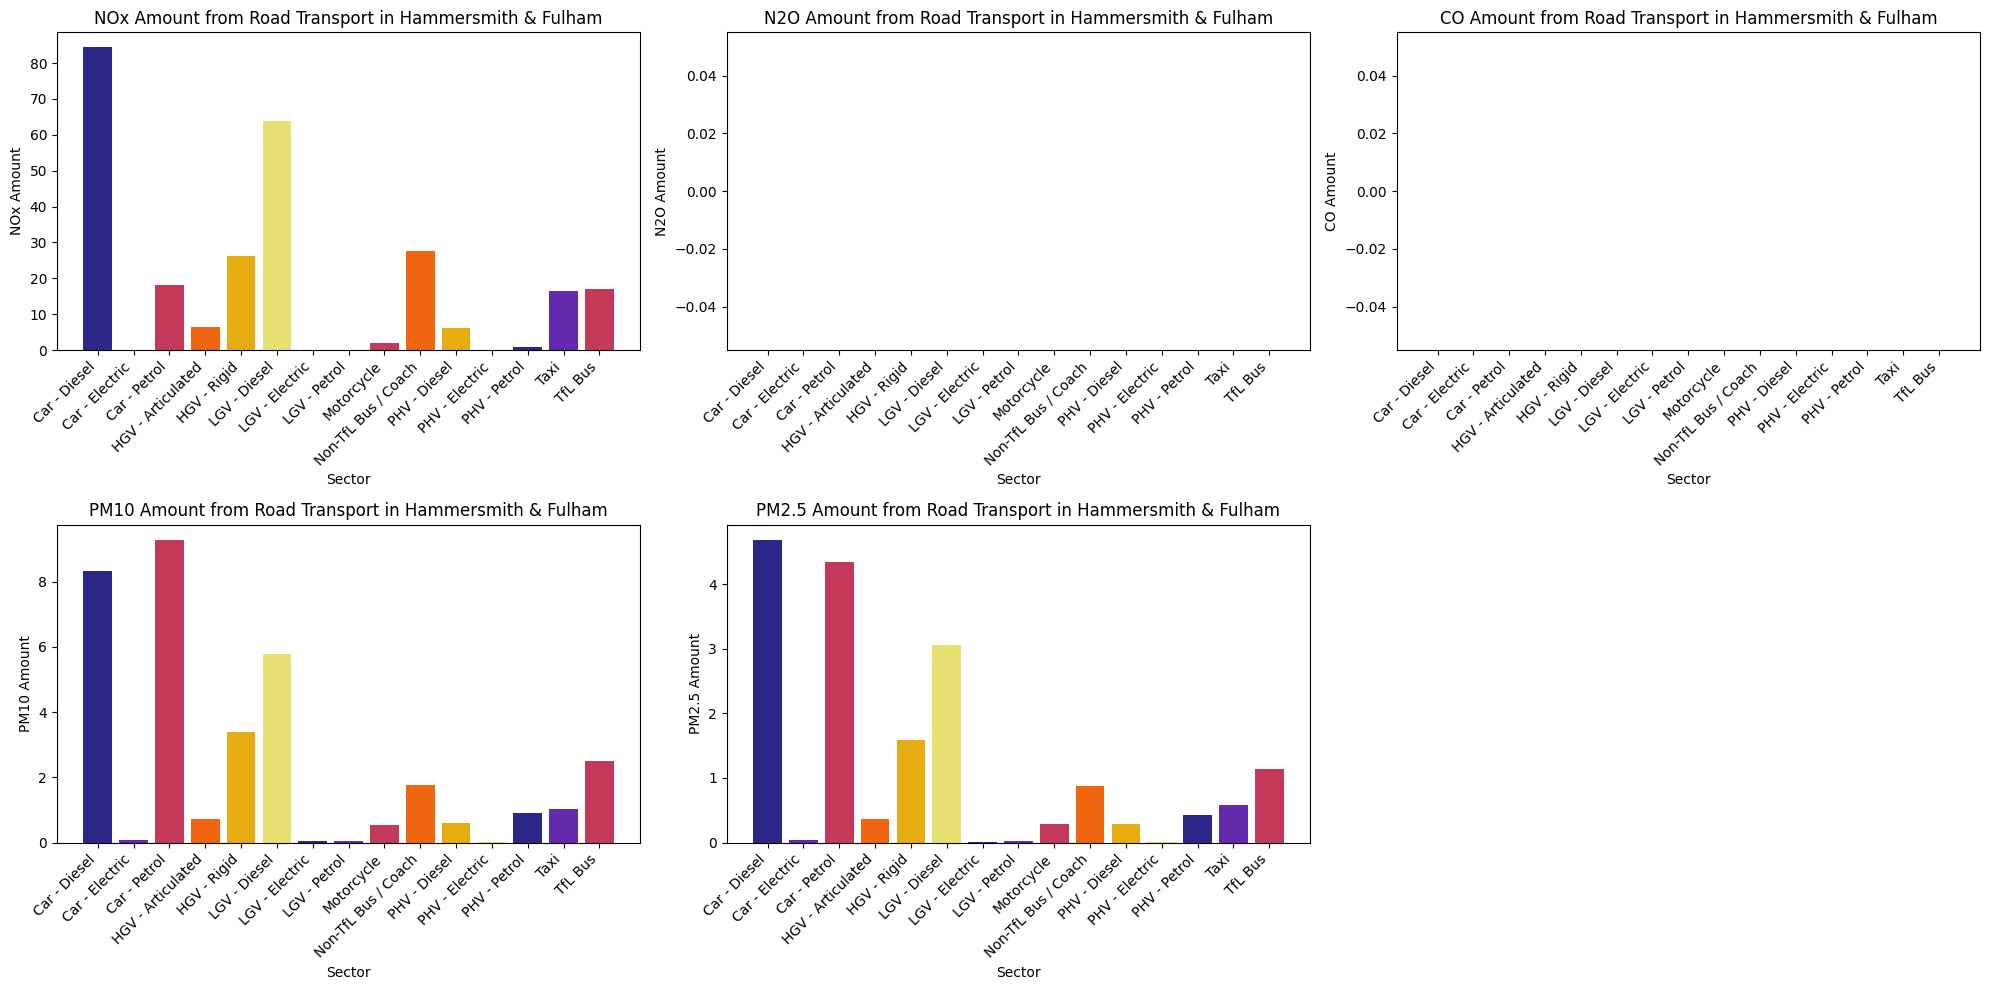

In [50]:
# Creating dataframes to plot graph
road_hf_nox_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['NOX'].sum().reset_index()
road_hf_n2o_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['N2O'].sum().reset_index()
road_hf_co_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['CO'].sum().reset_index()
road_hf_pm10_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM10'].sum().reset_index()
road_hf_pm2_5_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM2_5'].sum().reset_index()


plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from road transport sources
plt.subplot(2,3,1)
plt.bar(road_hf_nox_2019['SOURCE'], road_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(road_hf_n2o_2019['SOURCE'], road_hf_n2o_2019['N2O'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('N2O Amount')
plt.title('N2O Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,3)
plt.bar(road_hf_co_2019['SOURCE'], road_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(road_hf_pm10_2019['SOURCE'], road_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(road_hf_pm2_5_2019['SOURCE'], road_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Overview of Hammersmith & Fulham Analysis

- Industrial and Commecial purposes and Transportation produce most of the air pollution within the borough, with Industrial and Commerical purposes producing slightly more overall
- The main Industrial and Commercial source of air pollution is Heat and Power Generation, whilst the main Transport source is Road Transportation, specifically diesel cars
- Transport leads to the most NOx pollution, whilst Industrial and Commericial sources produce the most N2O, CO, PM10 and PM2.5 pollution